# Quantum Error Correction Project
## Philippe Noël, Alaisha Sharma, Nicolas Weninger
## 1. 3-qubit scheme

In [83]:
import os
import sys

from qutip import *

from qiskit import QuantumProgram
import Qconfig
from qiskit.tools.visualization import plot_histogram, plot_state
from qiskit.backends import local_backends, remote_backends
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

assert sys.version_info >= (3,5), "Only Python 3.5 or greater supported."

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Image

## Simulation Control

Measurement after simulation gate without errors (control):


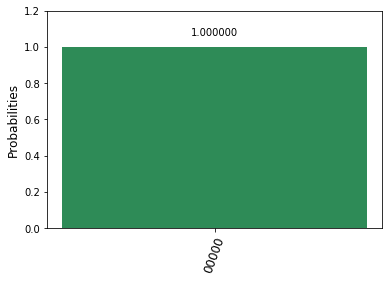

In [84]:
# Run circuit without any errors on local quantum simulator
qp1 = QuantumProgram()

# 3 qubits plus 2 ancillary qubits
n = 5

# Quantum register
q = qp1.create_quantum_register("q", n)
# Classical register
c = qp1.create_classical_register("c", n) 

# SimControl3 circuit
sim_control3 = qp1.create_circuit("SimControl3", [q], [c])

# Add gates
# Encode state
sim_control3.cx(q[0], q[1]) 
sim_control3.cx(q[1], q[2]) 
# Error detection
sim_control3.cx(q[0], q[3]) 
sim_control3.cx(q[1], q[3]) 
sim_control3.cx(q[0], q[4]) 
sim_control3.cx(q[1], q[4]) 

# Add measurement operation
sim_control3.measure(q[3], c[3])
sim_control3.measure(q[4], c[4])

# Execute circuit
results = qp1.execute("SimControl3")

# Plot measurement results 
print("Measurement after simulation gate without errors (control):")
plot_histogram(results.get_counts("SimControl3"))

## Simulation Bit Flip Detection

Measurement after gate detecting bit flip error on qubit 0 :


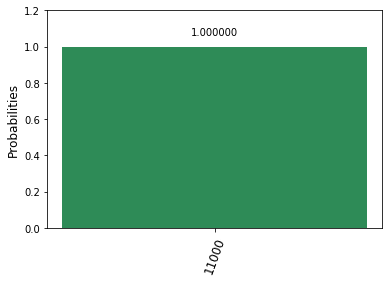

Measurement after gate detecting bit flip error on qubit 1 :


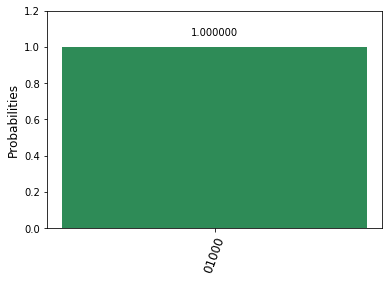

Measurement after gate detecting bit flip error on qubit 2 :


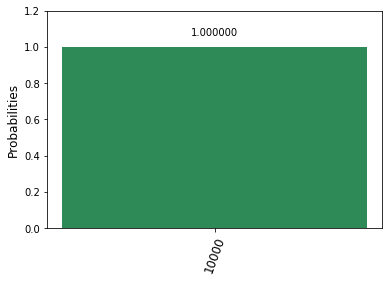

In [85]:
# 3 qubits plus 2 ancillary qubits
n = 5

for val in [0, 1, 2]:
    # Run circuit to detect single bit flip error on quantum simulator
    qp2eb = QuantumProgram()
    
    # Quantum register
    q = qp2eb.create_quantum_register("q", n)
    # Classical register
    c = qp2eb.create_classical_register("c", n) 

    # SimErrorBit3 circuit
    sim_err_bit3 = qp2eb.create_circuit("SimErrorBit3", [q], [c])

    # ADD GATES
    # Encode state
    sim_err_bit3.cx(q[0], q[1]) 
    sim_err_bit3.cx(q[0], q[2]) 
    # Introduce bit flip error
    sim_err_bit3.x(q[val])
    # Error detection
    sim_err_bit3.cx(q[0], q[3]) 
    sim_err_bit3.cx(q[1], q[3]) 
    sim_err_bit3.cx(q[0], q[4]) 
    sim_err_bit3.cx(q[2], q[4]) 

    # Add measurement operation
    sim_err_bit3.measure(q[3], c[3])
    sim_err_bit3.measure(q[4], c[4])

    # Execute circuit
    results = qp2eb.execute("SimErrorBit3")

    # Plot measurement results 
    print("Measurement after gate detecting bit flip error on qubit", val, ":")
    plot_histogram(results.get_counts("SimErrorBit3"))

## Simulation Bit Flip Correction

Measurement after gate correcting bit flip error on qubit 0 :


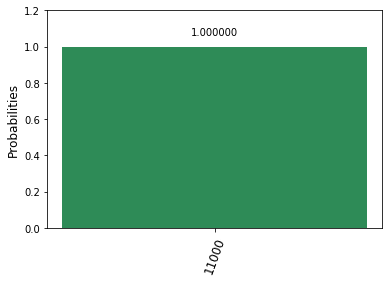

Measurement after gate correcting bit flip error on qubit 1 :


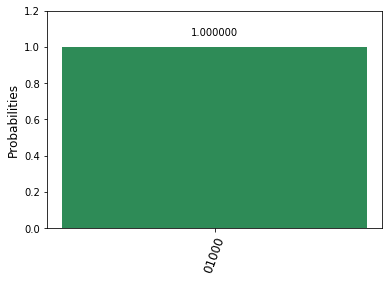

Measurement after gate correcting bit flip error on qubit 2 :


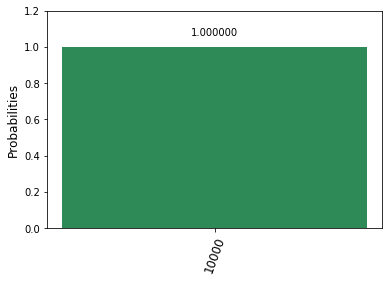

In [86]:
# 3 qubits plus 2 ancillary qubits
n = 5

for val in [0, 1, 2]:
    # Run circuit to correct single bit flip error on quantum simulator
    qp2cb = QuantumProgram()
    
    # Quantum register
    q = qp2cb.create_quantum_register("q", n)
    # Classical register
    c = qp2cb.create_classical_register("c", n) 
    
    # SimCorrectBit3 circuit
    sim_cor_bit3 = qp2cb.create_circuit("SimCorrectBit3", [q], [c])

    # ADD GATES
    # Encode state
    sim_cor_bit3.cx(q[0], q[1]) 
    sim_cor_bit3.cx(q[0], q[2]) 
    # Introduce bit flip error
    sim_cor_bit3.x(q[val])
    # Error detection
    sim_cor_bit3.cx(q[0], q[3]) 
    sim_cor_bit3.cx(q[1], q[3]) 
    sim_cor_bit3.cx(q[0], q[4]) 
    sim_cor_bit3.cx(q[2], q[4]) 
    # Error correction
    sim_cor_bit3.ccx(q[3], q[4], q[0])
    sim_cor_bit3.ccx(q[3], q[4], q[1])
    sim_cor_bit3.ccx(q[3], q[4], q[2])
    sim_cor_bit3.cx(q[3], q[1]) 
    sim_cor_bit3.cx(q[4], q[2]) 
    
    # Add measurement operation
    sim_cor_bit3.measure(q[0], c[0])
    sim_cor_bit3.measure(q[1], c[1])
    sim_cor_bit3.measure(q[2], c[2])
    sim_cor_bit3.measure(q[3], c[3])
    sim_cor_bit3.measure(q[4], c[4])

    # Execute circuit
    results = qp2cb.execute("SimCorrectBit3")

    # Plot measurement results 
    print("Measurement after gate correcting bit flip error on qubit", val, ":")
    plot_histogram(results.get_counts("SimCorrectBit3"))

## Simulation Phase Flip Detection

Measurement after gate detecting phase flip error on qubit 0 :


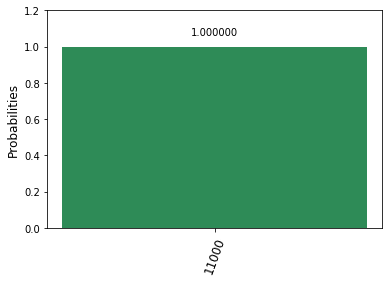

Measurement after gate detecting phase flip error on qubit 1 :


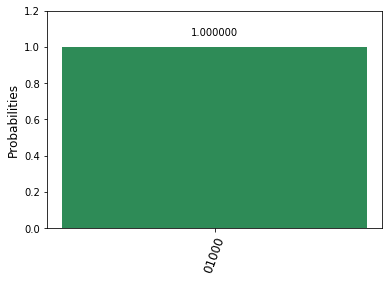

Measurement after gate detecting phase flip error on qubit 2 :


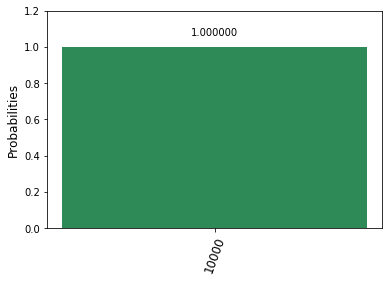

In [87]:
# 3 qubits plus 2 ancillary qubits
n = 5

for val in [0, 1, 2]:
    # Run circuit to detect single phase flip error on quantum simulator
    qp2ep = QuantumProgram()

    # Quantum register
    q = qp2ep.create_quantum_register("q", n)
    # Classical register
    c = qp2ep.create_classical_register("c", n) 

    # SimErrorPhase3 circuit
    sim_err_phase3 = qp2ep.create_circuit("SimErrorPhase3", [q], [c])
    
    # ADD GATES
    # Hadamard basis
    sim_err_phase3.h(q[0])
    # Encode state
    sim_err_phase3.cx(q[0], q[1]) 
    sim_err_phase3.cx(q[0], q[2])
    # Hadamard basis
    sim_err_phase3.h(q[0])
    sim_err_phase3.h(q[1])
    sim_err_phase3.h(q[2])
    # Introduce phase flip error
    sim_err_phase3.z(q[val])
    # Hadamard basis
    sim_err_phase3.h(q[0])
    sim_err_phase3.h(q[1])
    sim_err_phase3.h(q[2])
    # Error detection
    sim_err_phase3.cx(q[0], q[3]) 
    sim_err_phase3.cx(q[1], q[3]) 
    sim_err_phase3.cx(q[0], q[4]) 
    sim_err_phase3.cx(q[2], q[4]) 

    # Add measurement operation
    sim_err_phase3.measure(q[3], c[3])
    sim_err_phase3.measure(q[4], c[4])

    # Execute circuit
    results = qp2ep.execute("SimErrorPhase3")

    # Plot measurement results 
    print("Measurement after gate detecting phase flip error on qubit", val, ":")
    plot_histogram(results.get_counts("SimErrorPhase3"))

## Simulation Phase Flip Correction

Measurement after gate correcting phase flip error on qubit 0 :


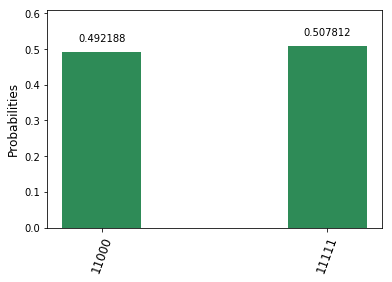

Measurement after gate correcting phase flip error on qubit 1 :


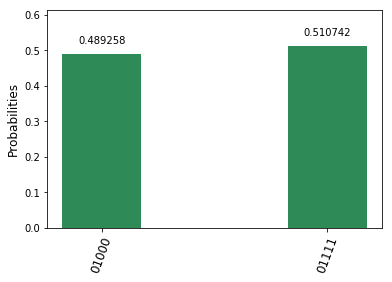

Measurement after gate correcting phase flip error on qubit 2 :


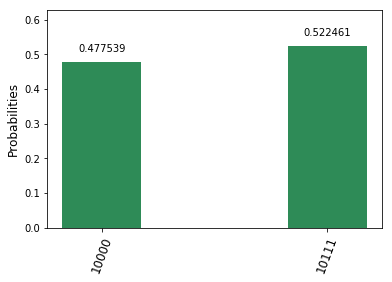

In [88]:
# 3 qubits plus 2 ancillary qubits
n = 5

for val in [0, 1, 2]:
    # Run circuit to detect single phase flip error on quantum simulator
    qp2cp = QuantumProgram()

    # Quantum register
    q = qp2cp.create_quantum_register("q", n)
    # Classical register
    c = qp2cp.create_classical_register("c", n) 

    # SimCorrectPhase3 circuit
    sim_cor_phase3 = qp2cp.create_circuit("SimCorrectPhase3", [q], [c])
    
    # ADD GATES
    # Hadamard basis
    sim_cor_phase3.h(q[0])
    # Encode state
    sim_cor_phase3.cx(q[0], q[1]) 
    sim_cor_phase3.cx(q[0], q[2])
    # Hadamard basis
    sim_cor_phase3.h(q[0])
    sim_cor_phase3.h(q[1])
    sim_cor_phase3.h(q[2])
    # Introduce phase flip error
    sim_cor_phase3.z(q[val])
    # Hadamard basis
    sim_cor_phase3.h(q[0])
    sim_cor_phase3.h(q[1])
    sim_cor_phase3.h(q[2])
    # Error detection
    sim_cor_phase3.cx(q[0], q[3]) 
    sim_cor_phase3.cx(q[1], q[3]) 
    sim_cor_phase3.cx(q[0], q[4]) 
    sim_cor_phase3.cx(q[2], q[4]) 
    # Error correction 
    sim_cor_phase3.ccx(q[3], q[4], q[0])
    sim_cor_phase3.ccx(q[3], q[4], q[1])
    sim_cor_phase3.ccx(q[3], q[4], q[2])
    sim_cor_phase3.cx(q[3], q[1]) 
    sim_cor_phase3.cx(q[4], q[2])
    sim_cor_phase3.z(q[0])
    sim_cor_phase3.z(q[1])
    sim_cor_phase3.z(q[2])
    
    # Add measurement operation
    sim_cor_phase3.measure(q[0], c[0])
    sim_cor_phase3.measure(q[1], c[1])
    sim_cor_phase3.measure(q[2], c[2])
    sim_cor_phase3.measure(q[3], c[3])
    sim_cor_phase3.measure(q[4], c[4])

    # Execute circuit
    results = qp2cp.execute("SimCorrectPhase3")

    # Plot measurement results 
    print("Measurement after gate correcting phase flip error on qubit", val, ":")
    plot_histogram(results.get_counts("SimCorrectPhase3"))

In [89]:
# initialize API to run on IBMQ
qp1.set_api(Qconfig.APItoken, Qconfig.config["url"])
display(local_backends())
display(remote_backends())

/anaconda3/lib/python3.6/site-packages/qiskit/_quantumprogram.py:707: DeprecationWarning: set_api() will be deprecated in upcoming versions (>0.5.0). Using the API object instead is recommended.
  "Using the API object instead is recommended.", DeprecationWarning)


['local_qasm_simulator',
 'local_clifford_simulator',
 'local_qiskit_simulator',
 'local_sympy_qasm_simulator',
 'local_sympy_unitary_simulator',
 'local_unitary_simulator']

['ibmqx_hpc_qasm_simulator',
 'ibmqx4',
 'ibmqx5',
 'ibmqx2',
 'ibmqx_qasm_simulator']

## IBMQ Control

In [91]:
# Run circuit without any errors on IBMQ backend
qp3 = QuantumProgram()

# 3 qubits plus 2 ancillary qubits
n = 5

# Quantum register
q = qp3.create_quantum_register("q", n)
# Classical register
c = qp3.create_classical_register("c", n) 

# SimControl3 circuit
imbq_control3 = qp3.create_circuit("IBMQControl3", [q], [c])

# Add gates
# Encode state
imbq_control3.cx(q[0], q[1]) 
imbq_control3.cx(q[1], q[2]) 
# Error detection
imbq_control3.cx(q[0], q[3]) 
imbq_control3.cx(q[1], q[3]) 
imbq_control3.cx(q[0], q[4]) 
imbq_control3.cx(q[1], q[4]) 

# Add measurement operation
imbq_control3.measure(q[3], c[3])
imbq_control3.measure(q[4], c[4])

# Set parameters
backend = 'ibmqx4'   
circuits = ['IBMQControl3']  
shots = 1024           
max_credits = 3          
wait = 10   
timeout = 240 
results_real = qp3.execute(circuits, backend, shots=shots, max_credits=max_credits, wait=wait, timeout=timeout)
results_real.get_counts("IBMQControl3")

NameError: name 'results_real' is not defined

## IBMQ Bit Flip Detection

In [ ]:
# Run circuit to detect bit flip error on IBMQ backend
qp4eb = QuantumProgram()

# 3 qubits plus 2 ancillary qubits
n = 5

# Quantum register
q = qp4eb.create_quantum_register("q", n)
# Classical register
c = qp4eb.create_classical_register("c", n) 

# SimControl3 circuit
imbq_err_bit3 = qp4eb.create_circuit("IMBQErrorBit3", [q], [c])

# ADD GATES
# Encode state
imbq_err_bit3.cx(q[0], q[1]) 
imbq_err_bit3.cx(q[1], q[2]) 
# Introduce bit flip error
imbq_err_bit3.x(q[0])
# Error detection
imbq_err_bit3.cx(q[0], q[3]) 
imbq_err_bit3.cx(q[1], q[3]) 
imbq_err_bit3.cx(q[0], q[4]) 
imbq_err_bit3.cx(q[1], q[4]) 

# Add measurement operation
imbq_err_bit3.measure(q[3], c[3])
imbq_err_bit3.measure(q[4], c[4])

# Set parameters
backend = 'ibmqx4'   
circuits = ['IMBQErrorBit3']  
shots = 1024           
max_credits = 3          
wait = 10   
timeout = 240 
results_real = qp4eb.execute(circuits, backend, shots=shots, max_credits=max_credits, wait=wait, timeout=timeout)
results_real.get_counts("IMBQErrorBit3")

## IBMQ Phase Flip Detection

In [ ]:
# Run circuit to detect phase flip error on IBMQ backend
qp4ep = QuantumProgram()

# 3 qubits plus 2 ancillary qubits
n = 5

# Quantum register
q = qp4ep.create_quantum_register("q", n)
# Classical register
c = qp4ep.create_classical_register("c", n) 

# IBMQControl4 circuit
imbq_err_phase3 = qp4ep.create_circuit("IMBQErrorPhase3", [q], [c])

# ADD GATES
# Hadamard basis
imbq_err_phase3.h(q[0]) 
imbq_err_phase3.h(q[1]) 
imbq_err_phase3.h(q[2]) 
imbq_err_phase3.h(q[3]) 
imbq_err_phase3.h(q[4]) 
# Encode state
imbq_err_phase3.cx(q[0], q[1]) 
imbq_err_phase3.cx(q[1], q[2]) 
# Introduce bit flip error
imbq_err_phase3.z(q[0])
# Error detection
imbq_err_phase3.cx(q[0], q[3]) 
imbq_err_phase3.cx(q[1], q[3]) 
imbq_err_phase3.cx(q[0], q[4]) 
imbq_err_phase3.cx(q[1], q[4]) 
# Reverse Hadamard basis
imbq_err_phase3.h(q[0]) 
imbq_err_phase3.h(q[1]) 
imbq_err_phase3.h(q[2]) 
imbq_err_phase3.h(q[3]) 
imbq_err_phase3.h(q[4]) 

# Add measurement operation
imbq_err_phase3.measure(q[3], c[3])
imbq_err_phase3.measure(q[4], c[4])

# Set parameters
backend = 'ibmqx4'   
circuits = ['IMBQErrorPhase3']  
shots = 1024           
max_credits = 3          
wait = 10   
timeout = 240 
results_real = qp4ep.execute(circuits, backend, shots=shots, max_credits=max_credits, wait=wait, timeout=timeout)
results_real.get_counts("IBMQErrorPhase3")